In [1]:
!dir C:\SimplonIA\projet1_e_commerce\raw_data

 Le volume dans le lecteur C s'appelle Windows
 Le num‚ro de s‚rie du volume est 5A52-AD0E

 R‚pertoire de C:\SimplonIA\projet1_e_commerce\raw_data

01/11/2020  15:48    <DIR>          .
01/11/2020  15:48    <DIR>          ..
11/10/2019  21:24           171ÿ352 olist_closed_deals_dataset.csv
06/10/2019  20:27         9ÿ033ÿ957 olist_customers_dataset.csv
27/08/2020  08:00         4ÿ756ÿ170 olist_customers_dataset.zip
06/10/2019  20:27        61ÿ273ÿ883 olist_geolocation_dataset.csv
27/08/2020  08:00        15ÿ179ÿ064 olist_geolocation_dataset.zip
11/10/2019  21:24           703ÿ836 olist_marketing_qualified_leads_dataset.csv
06/10/2019  20:27        17ÿ654ÿ914 olist_orders_dataset.csv
27/08/2020  08:00         6ÿ962ÿ019 olist_orders_dataset.zip
06/10/2019  20:27        15ÿ438ÿ671 olist_order_items_dataset.csv
27/08/2020  08:00         6ÿ589ÿ979 olist_order_items_dataset.zip
06/10/2019  20:27         5ÿ777ÿ138 olist_order_payments_dataset.csv
27/08/2020  08:00         2ÿ565ÿ951 olist_or

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

%matplotlib inline

In [3]:
df_products = pd.read_csv(r'C:\SimplonIA\projet1_e_commerce\raw_data\olist_products_dataset.csv')
df_items = pd.read_csv(r'C:\SimplonIA\projet1_e_commerce\raw_data\olist_order_items_dataset.csv')
df_orders = pd.read_csv(r'C:\SimplonIA\projet1_e_commerce\raw_data\olist_orders_dataset.csv')
df_payments = pd.read_csv(r'C:\SimplonIA\projet1_e_commerce\raw_data\olist_order_payments_dataset.csv')
df_translat  = pd.read_csv(r'C:\SimplonIA\projet1_e_commerce\raw_data\product_category_name_translation.csv')

In [4]:
df_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [5]:
df_translat.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [6]:
df_translat = df_translat[['product_category_name', 'product_category_name_english']]
df_products = df_products[['product_category_name', 'product_id']]
df_items = df_items[['product_id', 'order_id', 'price' ]]
df_orders = df_orders[['order_id' ]]
df_payments = df_payments[['order_id']]


In [7]:
df0 = df_translat.merge(df_products, on = 'product_category_name')
df1 = df0.merge(df_items, on = 'product_id')
df2 = df1.merge(df_orders, on = 'order_id')
df3 = df2.merge(df_payments, on = 'order_id')
df3.drop(columns = ['order_id', 'product_id', 'product_category_name' ], inplace = True  )
df3.rename(columns = {'product_category_name_english' : 'produit', 'price' : 'prix'}, inplace=True)
df3.head(2)

,produit,prix
0,health_beauty,29.9
1,health_beauty,95.9


In [8]:
df3 = df3.groupby('produit').agg({'prix' : 'sum'})

df3.sort_values('prix', ascending=False)
df3.reset_index(inplace=True)
df3.head(3)

,produit,prix
0,agro_industry_and_commerce,83841.95
1,air_conditioning,55962.38
2,art,24721.97


In [9]:
df3.sort_values('prix', ascending = False, inplace=True)
df3

,produit,prix
43,health_beauty,1297355.80
70,watches_gifts,1253143.30
7,bed_bath_table,1092551.02
65,sports_leisure,1023996.34
15,computers_accessories,942277.57
...,...,...
35,flowers,1110.04
46,home_comfort_2,773.17
11,cds_dvds_musicals,730.00
29,fashion_childrens_clothes,569.85


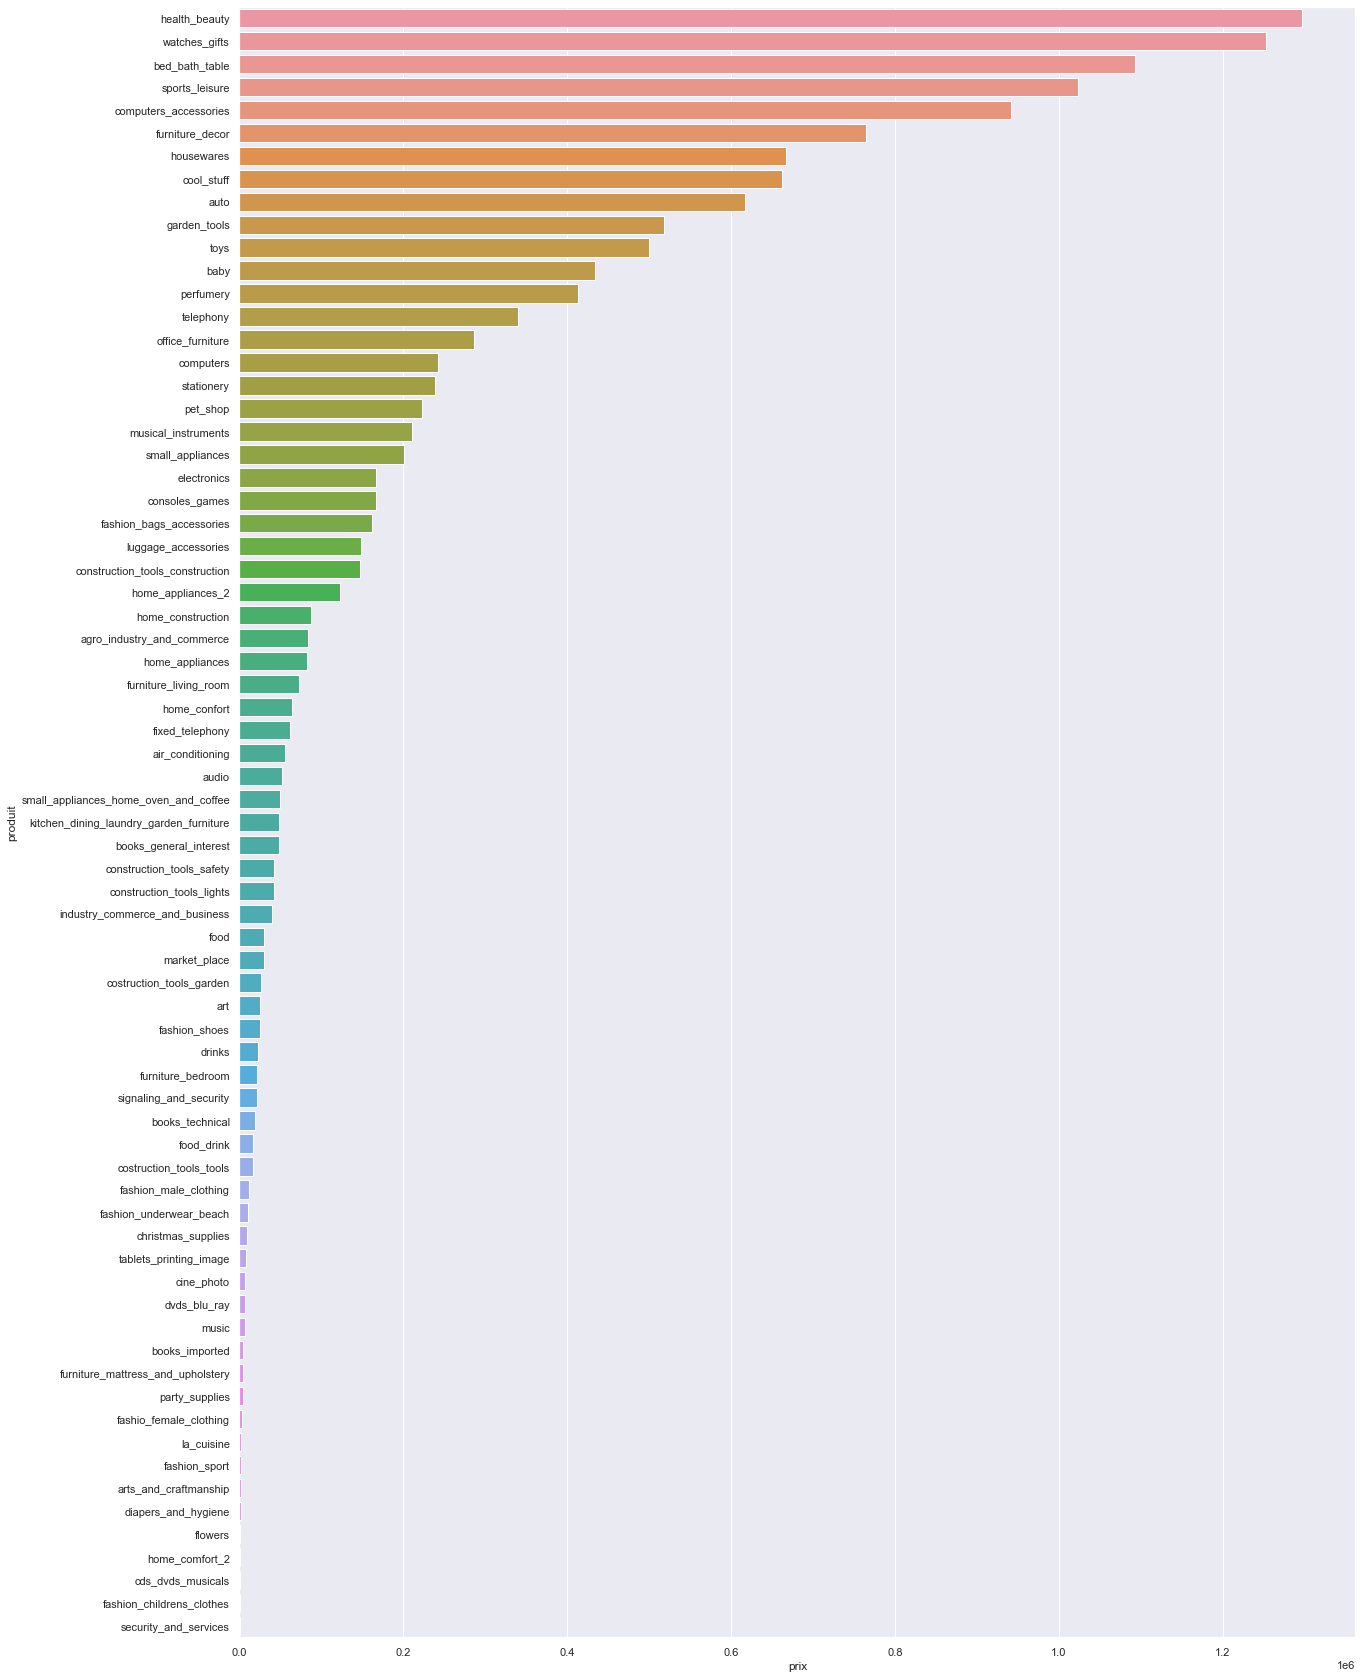

In [13]:
sns.set(rc={'figure.figsize':(20,30)})

ax = sns.barplot(y= 'produit', 
                      x = 'prix', 
                      data = df3)